# Contents

> importing libraries and data

> replace outliers as missing: anything above 100 under 'prices'

> create a sample

> create charts: bar chart, histogram, scatterplot, linechart

> Histogram insights: 10am is the most popular time. 

> loyalty flag bar chart

> line chart of prices and order_hour_of_day

> determine connection between age and family situation using a line chart

> scatterplot of income and age

> export visualisations

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing data

In [2]:
path=r'/Users/vanessalimsingh/Instacart Basket Analysis 07-05-2024'

In [3]:
df=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data', 'ords_prods_customers.pkl'))

In [4]:
df.shape

(32404859, 31)

In [5]:
pd.set_option('display.max_columns', None) 

In [6]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,ave_prices,spend_flag,median_days_since_prior_order,freq_flag,Gender,State,Age,date_joined,Dependants,Status,income,Full Name,merge_indicator
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,both


In [7]:
df['prices'].max()

99999.0

In [8]:
df.loc[df['prices'] > 100]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,ave_prices,spend_flag,median_days_since_prior_order,freq_flag,Gender,State,Age,date_joined,Dependants,Status,income,Full Name,merge_indicator
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,high_spender,5.0,Freq_customer,Female,Kansas,39,9/16/2018,3,married,150659,Barbara Chang,both
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,high_spender,5.0,Freq_customer,Female,Kansas,39,9/16/2018,3,married,150659,Barbara Chang,both
16522,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Average orders,4,New customer,1154.792308,high_spender,12.0,Regular_customer,Female,Maryland,30,3/19/2017,3,married,120635,NaN,both
16528,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Busiest days,Average orders,4,New customer,1154.792308,high_spender,12.0,Regular_customer,Female,Maryland,30,3/19/2017,3,married,120635,NaN,both
53672,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,high_spender,23.0,Non_Freq_customer,Female,Minnesota,56,8/23/2018,2,married,187328,Ruby Bates,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Busiest days,Most orders,25,Regular customer,351.141618,high_spender,6.0,Freq_customer,Male,Kentucky,62,10/2/2017,0,divorced/widowed,302526,Jeremy Vang,both
32347717,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Most orders,25,Regular customer,170.073770,high_spender,13.0,Regular_customer,Male,Maryland,60,7/12/2019,1,married,172539,James Hunter,both
32347727,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Least busy,fewest orders,25,Regular customer,170.073770,high_spender,13.0,Regular_customer,Male,Maryland,60,7/12/2019,1,married,172539,James Hunter,both
32380527,1916142,206049,1,2,17,NaN,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Average orders,5,New customer,938.031250,high_spender,7.0,Freq_customer,Female,District of Columbia,23,4/26/2019,1,married,169022,Louise Leal,both


In [9]:
#replace outliers as missing
df.loc[df['prices'] >100, 'prices'] = np.nan

In [10]:
df.loc[df['prices'] > 100]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,ave_prices,spend_flag,median_days_since_prior_order,freq_flag,Gender,State,Age,date_joined,Dependants,Status,income,Full Name,merge_indicator


In [11]:
#export dataset without outlier
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merge_4-9.pkl'))

## Create a sample

In [12]:
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [13]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [14]:
#split your dataframe into two samples
big = df[dev]

In [15]:
small=df[~dev]

In [16]:
len(big)+len(small)

32404859

In [17]:
small.shape

(9721098, 31)

# Create charts

In [28]:
small.head(
)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,ave_prices,spend_flag,median_days_since_prior_order,freq_flag,Gender,State,Age,date_joined,Dependants,Status,income,Full Name,merge_indicator
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,both
6,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,117,19,3.0,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,both
10,2398795,1,2,3,7,15.0,13032,6,0,Cinnamon Toast Crunch,121,14,4.0,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,both


In [34]:
small.groupby('Dependants')['median_days_since_prior_order'].describe()

,count,mean,std,min,25%,50%,75%,max
Dependants,,,,,,,,
0,2428259.0,10.365471,7.114438,0.0,6.0,8.0,13.0,30.0
1,2424259.0,10.423315,7.175850,0.0,6.0,8.0,13.0,30.0
2,2429032.0,10.410271,7.127812,0.0,6.0,8.0,13.0,30.0
3,2439547.0,10.389375,7.112019,0.0,6.0,8.0,13.0,30.0


<Axes: xlabel='order_dow'>

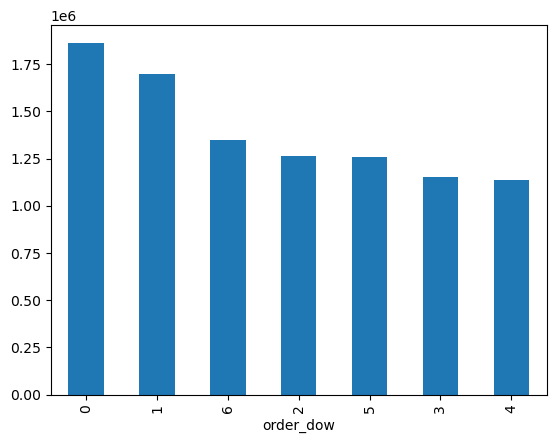

In [19]:
#a bar chart of days of week
small['order_dow'].value_counts().plot.bar()

Text(0.5, 1.0, 'Busiest hours of the day')

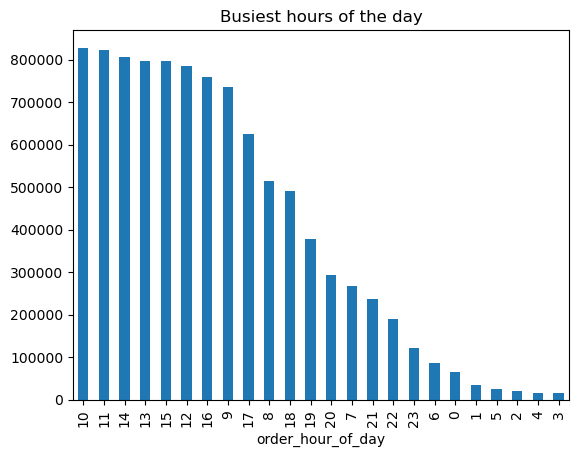

In [20]:
#a bar chart of hours of day
bar_BOTD=small['order_hour_of_day'].value_counts().plot.bar()
bar_BOTD.set_title('Busiest hours of the day')

In [21]:
bar_BOTD.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'hourofday2.png'))

<Axes: ylabel='Frequency'>

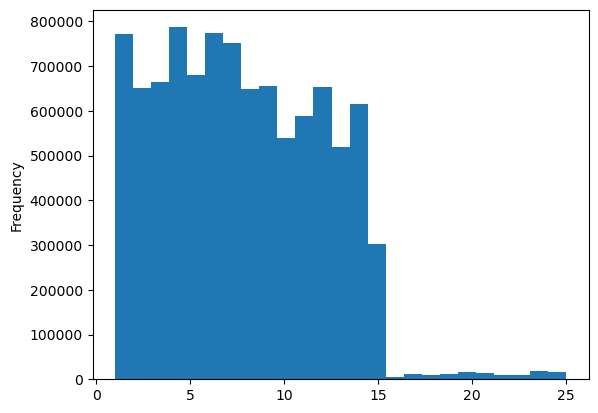

In [22]:
#a histogram of the “prices” column.
small['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

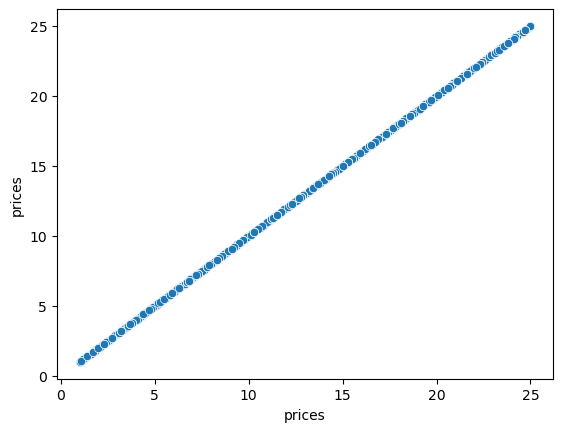

In [23]:
#create a scatterplot of prices
sns.scatterplot(x = 'prices', y = 'prices',data = small)

In [24]:
#Create a line chart of order_dow and prices
small_linechart= small[['order_dow','prices']]

In [25]:
small_linechart.head()

,order_dow,prices
0,2,9.0
2,2,4.4
3,2,4.7
6,3,3.0
10,3,4.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


KeyboardInterrupt: 

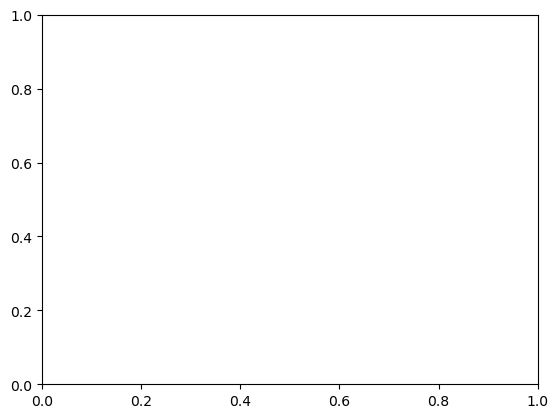

In [26]:
line = sns.lineplot(data = small_linechart, x = 'order_dow',y = 'prices')

# 3.

In [ ]:
#a histogram of the “hour of day” column.
hist_HOD=small['order_hour_of_day'].plot.hist(bins = 45)

## The histogram shows that 10 am is the most popular time for customers to place orders. The hours between 10-16 see the most activity, while 17 - 0800 see the least activity.

# 4. 

In [ ]:
#a bar chart of loyalty flag.
#> 40 = 'Loyal customer'
#<= 40 & > 10) = 'Regular customer'
#<= 10 = 'New customer'


In [ ]:
loyaltyflag_bar=small['loyalty_flag'].value_counts().plot.bar()


# 5.

In [ ]:
#compare prices and hour of day using a line chart. reduce df to necessary columns. 
small_linechart_2 = small[['order_hour_of_day','prices']]

In [ ]:
small_linechart_2.head()

In [ ]:
linechart_hour_prices = sns.lineplot(data = small_linechart_2, x = 'order_hour_of_day',y = 'prices')
x_values = range(24)
linechart_hour_prices.set_xticks(x_values)

## Prices are highest at 3:00.
## Prices decrease sharply from 05:00 - 10:00, and are lowest at 10am. It steadily increases from there. 

# 6.

In [ ]:
# determine whether there’s a connection between age and family situation by creating a line chart 
# exploring the connections between age and number of dependents:

In [ ]:
small.columns

In [ ]:
small_linechart_3 = small[['Age','Dependants']]

In [ ]:
small_linechart_3.head()

In [ ]:
linechart_age_depd = sns.lineplot(data = small_linechart_3, x = 'Age',y = 'Dependants')


# There does not seem to be a clear connection between age and dependants

# 7.

In [ ]:
#age and spending power (income). To visualize this relationship, create a scatterplot 
#using the sns.scatterplot() function.

In [ ]:
#creat df with relevant columns
small_sp_age_spend = small[['Age','income']]

In [ ]:
small_sp_age_spend.head()

In [ ]:
sns.scatterplot(x = 'Age', y = 'income',data = small_sp_age_spend)

# People with higher spending power tend to be people over 40, although majority seem to fall under the 300,000 income mark. 

# Export visualisations

In [ ]:
scatter_age_income=sns.scatterplot(x = 'Age', y = 'income',data = small_sp_age_spend)


In [ ]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'scatter_age_income.png'),bbox_inches='tight')

In [ ]:
linechart_age_depd.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'linechart_age_depd.png'))

In [ ]:
linechart_hour_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'linechart_hour_prices.png'))

In [ ]:
loyaltyflag_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'loyaltyflag_bar.png'), bbox_inches='tight')


In [ ]:
hist_HOD.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_hour_of_day.png'),bbox_inches='tight')